# An OpenSCAD Quadrotor in Juypterlab
This is workbook demonstrates how to use the [OpenSCAD kernel](https://github.com/pschatzmann/IOpenSCAD) in Jupyterlab to build a Quadrotor Model directly using the OpenSCAD syntax.

If serves as a proof of concept to identify the strengths and weaknesses of the current design.

## Setup
We start with an initial setup of the environment. 
This way we will get some consistent results if we decided to run all cells

In [28]:
%clear
%mime image/png


SCAD code buffer has been cleared
The display mime type is 'image/png'
The display command is 'xvfb-run --auto-servernum --server-num=99 openscad'
The display command is 'openscad'

## Variables
We can define some varibles that we want to use in our design

In [29]:
$fn = 80;
heightMotor = 6;
motorDiameter = 8.6;
outerRingDiameter = 75;
pinHeight = 10;
quadHeight = 3;
quadWidth = 1;


Number of lines of OpenSCAD code: 9


We can display the currently defined OpenSCAD code

In [30]:
%displayCode


$fn = 80;
heightMotor = 6;
motorDiameter = 8.6;
outerRingDiameter = 75;
pinHeight = 10;
quadHeight = 3;
quadWidth = 1;



## Constructing a Motor Section
We start to define a ring in the expected size  of our propellers. This is just the difference between 2 cylinders

Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


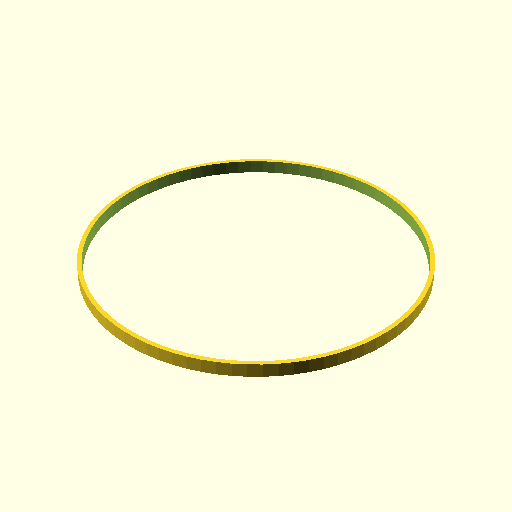

In [31]:
module motorRing() {  
    difference()  {
            cylinder(h=quadHeight,d=outerRingDiameter,center=true); 
            cylinder(h=quadHeight*2,d=outerRingDiameter-(quadWidth*2),center=true); 
    } 
}

%display motorRing();

The motor will be mounted on an inner cylider

Compiling design (CSG Products normalization)...
Normalized CSG tree has 3 elements


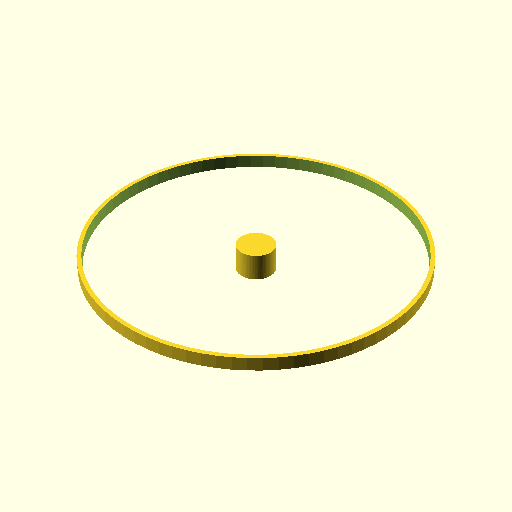

In [32]:
module motorInnerRing() {
    translate([0,0,-(quadHeight/2)]) cylinder(h=heightMotor,d=motorDiameter,center=true); 
}

%display motorInnerRing(); motorRing();

We add some spokes by rotating a cube:

Compiling design (CSG Products normalization)...
Normalized CSG tree has 7 elements


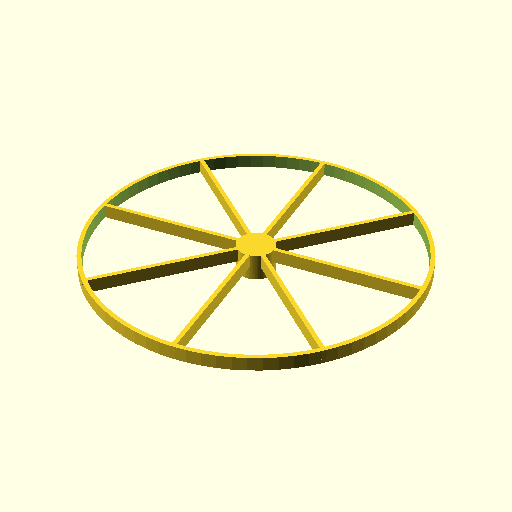

In [33]:
module motorBase() {
    union()  {
            motorRing();
            motorInnerRing();
            cube([outerRingDiameter,quadWidth,quadHeight],center=true); 
            rotate(a=[0,0,45]) cube([outerRingDiameter,quadWidth,quadHeight],center=true); 
            cube([quadWidth,outerRingDiameter,quadHeight],center=true); 
            rotate(a=[0,0,45]) cube([quadWidth,outerRingDiameter,quadHeight],center=true); 
    } 
}

%display motorBase();

Finally we just need to cut a hole in the center so that we can fit our planned motor holder

Compiling design (CSG Products normalization)...
Normalized CSG tree has 13 elements


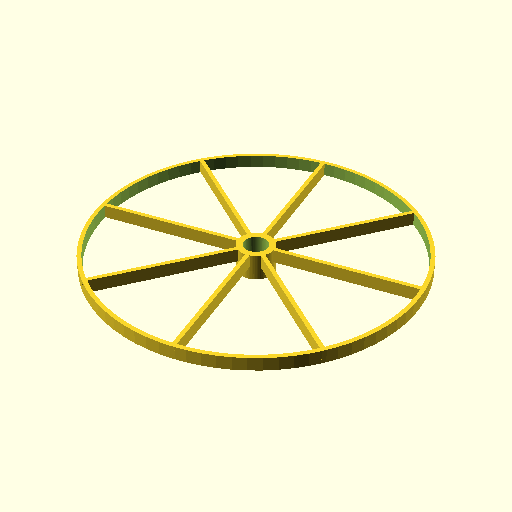

In [34]:
module motor() {
    difference()  {
            motorBase();
            cylinder(h=heightMotor*3,d=motorDiameter-(quadWidth*3),center=true); 
    } 
}

%display motor();

## Constructing the Quad
Our quad consists just of the 4 motors displced into the 4 corners

Compiling design (CSG Products normalization)...
Normalized CSG tree has 52 elements


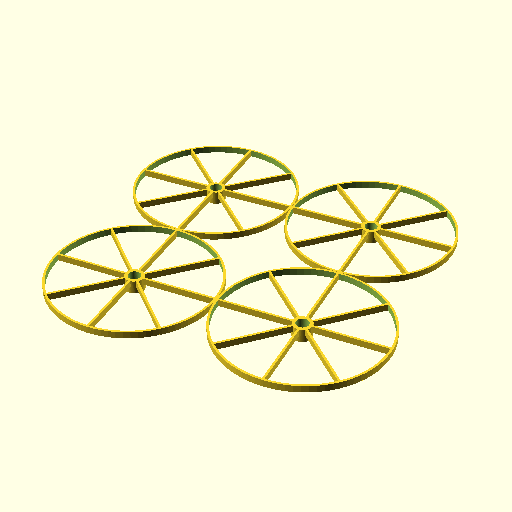

In [35]:
module quad() {
        motorDistance = outerRingDiameter/2;
        translate([motorDistance,motorDistance,0]) motor();
        translate([-motorDistance,-motorDistance,0]) motor();
        translate([motorDistance,-motorDistance,0]) motor();
        translate([-motorDistance,motorDistance,0]) motor();
}

%display quad();

## Construction of the Motor Holder

We are constructing our motor holder with the help of hollow cylinders

Compiling design (CSG Products normalization)...
Normalized CSG tree has 3 elements


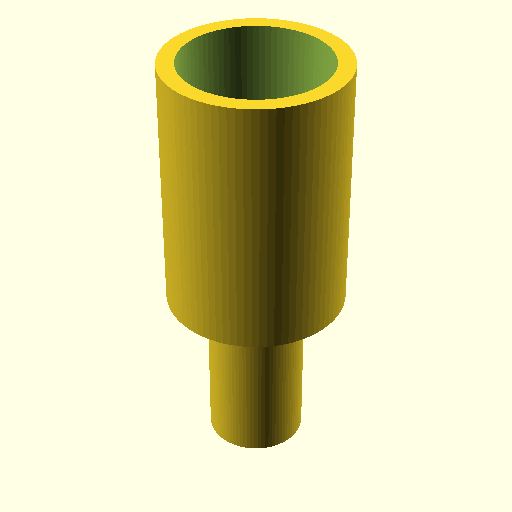

In [36]:
cutWidth = 1;
motorHodlerHeight = 15;
motorDiameter = 8.6;
pinWidth = 5.75;
width = 1;

module motorHolder() {
    cylinder(h=pinHeight,d=pinWidth); 
    translate([0.0,0.0,pinHeight]) 
    difference()  {
            cylinder(h=motorHodlerHeight,d=motorDiameter+(width*2)); 
            translate([0.0,0.0,3.0]) cylinder(h=motorHodlerHeight,d=motorDiameter); 
    } 
}

%display motorHolder();

And we cut out a small section on the side

Compiling design (CSG Products normalization)...
Normalized CSG tree has 5 elements


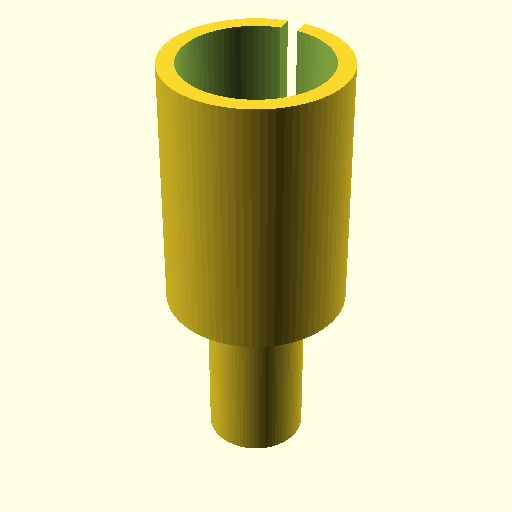

In [37]:
module motorHolderWithCut() {
    
    difference()  {
            motorHolder();
            translate([0,motorDiameter/2-1,0]) cube([cutWidth,motorDiameter,1000],center=true); 
    } 
}

%display motorHolderWithCut();

# Mounting the Flight Controller 
We will use a Raspberry PI Case as enclosure for the flight controller which will be put in the center of our Quad.
The related SCAD code can be loaded with the help of a %include command. 

We redefine the numberOfPis parameter which is used to potentially generate multiple stacked case sections:

Included number of statements: 71Compiling design (CSG Products normalization)...
Normalized CSG tree has 22 elements


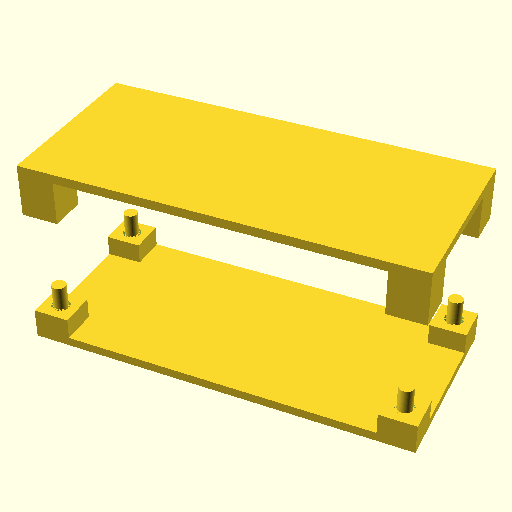

In [38]:
%include https://raw.githubusercontent.com/pschatzmann/openscad-models/master/SimpleStackablePi-Zero-Case.scad
numberOfPis=1;

%display

## Putting All Components Together
Finally we just need to add the case, the motor holders and the quad and move it so that the PI is ending up in the center

Compiling design (CSG Products normalization)...
Normalized CSG tree has 99 elements


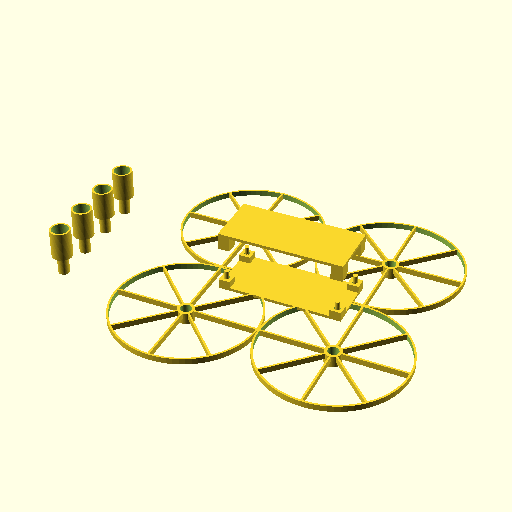

In [39]:
module finalDesign() {
    piCaseBottom();
    translate([widthOfPi/2,depthOfPi/2,0]) quad();
    translate([-outerRingDiameter,-20,0]) motorHolder();
    translate([-outerRingDiameter,0,0]) motorHolder();
    translate([-outerRingDiameter,20,0]) motorHolder();
    translate([-outerRingDiameter,40,0]) motorHolder();
}

finalDesign();

%%display

## Conclusion
### Weaknesses
- The major issue I was running into was, that I was executing some Markdown as Code which resulted as invalid OpenScad Source Code. So I extended the parsing to issue an error message if the submitted statement could not be parsed and does not end up with a ;
- Currently there is no possiblity to exchange information with other kernels to provide some polyglot functionality using different programming languages. However it is unclear if this would give any added value.

### Strengths
- The possibility to **build the model in steps** and to display the different steps is very powerful 
- It proofed to be helpfull to be able to define the **rendering command**: So xvfb could be included into the processing w/o the need for any code changes 
- The possiblity to **use external** models by integrating them with an URL is very helpfull and avoids the need to copy files around. 
- The programming is in OpenSCAD and the final result is valid OpenSCAD code that can be shared.


I think I will start to build my future models with the help of this Kernel.

Last but not least here is the complete OpenSCAD code:

In [40]:
%displayCode


$fn = 80;
heightMotor = 6;
motorDiameter = 8.6;
outerRingDiameter = 75;
pinHeight = 10;
quadHeight = 3;
quadWidth = 1;
module motorRing() {  
    difference()  {
            cylinder(h=quadHeight,d=outerRingDiameter,center=true); 
            cylinder(h=quadHeight*2,d=outerRingDiameter-(quadWidth*2),center=true); 
    } 
}

module motorInnerRing() {
    translate([0,0,-(quadHeight/2)]) cylinder(h=heightMotor,d=motorDiameter,center=true); 
}

module motorBase() {
    union()  {
            motorRing();
            motorInnerRing();
            cube([outerRingDiameter,quadWidth,quadHeight],center=true); 
            rotate(a=[0,0,45]) cube([outerRingDiameter,quadWidth,quadHeight],center=true); 
            cube([quadWidth,outerRingDiameter,quadHeight],center=true); 
            rotate(a=[0,0,45]) cube([quadWidth,outerRingDiameter,quadHeight],center=true); 
    } 
}

module motor() {
    difference()  {
            motorBase();
            cylinder(h=heightMotor*3,d=motorDiameter-(quadWi

In [41]:
%lsmagic

Available Commands: %clear %display %displayCode %%display %%displayCode %mime %command %lsmagic %include %use %saveAs